# Femur length simulation

In [125]:
import numpy as np

def simulate_femur_lengths(
    n_zebras=200,
    rate_mean=18,        # mean growth rate (mm per year)
    rate_sd=3,         # sd of growth rate
    mortality_rate=0.40,  # exponential death rate (1 / year)
    time_to_maturity=5,  # time to reach maturity (years)
    L0_mean=360.0,             # mean starting femur length (mm)
    L0_sd=10.0,          # sd of starting femur length,
    seed=42
):
    rng = np.random.default_rng(seed)

    # Sample growth rates (resample negatives to avoid biologically implausible shrinkage)
    rates = rng.normal(rate_mean, rate_sd, size=n_zebras)
    while np.any(rates < 0):
        neg = rates < 0
        rates[neg] = rng.normal(rate_mean, rate_sd, size=neg.sum())

    # Sample initial femur lengths
    L0 = rng.normal(L0_mean, L0_sd, size=n_zebras)
    while np.any(L0 <= 0):
        neg = L0 <= 0
        L0[neg] = rng.normal(L0_mean, L0_sd, size=neg.sum())
    # Sample death times
    death_times = rng.exponential(scale=1.0 / mortality_rate, size=n_zebras)

    # Linear growth until maturity except for those that die before maturity
    growth_times = np.minimum(death_times, time_to_maturity)
    femur_lengths = L0 + rates * growth_times

    return femur_lengths  # NumPy array


# Example
femur_length_0 = simulate_femur_lengths(n_zebras=308) # wild "population"
femur_length_1 = simulate_femur_lengths(n_zebras=91, rate_sd=3, mortality_rate=0.25) # "zoo population" with less growth variability
joint = np.concatenate([femur_length_0[:300], femur_length_1, femur_length_0[300:]])

In [129]:
# add headers to these csv files
np.savetxt('data/femur_length_dr_L.csv', femur_length_1, delimiter=',', header='femur_length', comments='')
np.savetxt('data/femur_length_dr_W.csv', joint, delimiter=',', header='femur_length', comments='')

In [132]:
femur_length_2 = simulate_femur_lengths(n_zebras=233) # another study on the same population!
# save this
np.savetxt('data/femur_length_previous.csv', femur_length_2, delimiter=',', header='femur_length', comments='')

# Heteroscedasticity example

In [152]:
def simulate_scores(n=200, seed=0):
    rng = np.random.default_rng(seed)
    
    hours = rng.uniform(0, 10, size=n)
    
    beta0 = 50
    beta1 = 5
    sigma = 20  # baseline scale
    
    # Variance decreases with study hours
    noise_sd = sigma / np.sqrt(hours**2 + 1)
    noise = rng.normal(0, noise_sd)
    
    scores = beta0 + beta1 * hours + noise
    # if negative scores are generated, set them to 0 (since scores can't be negative)
    scores = np.maximum(scores, 0)
    scores = np.minimum(scores, 100)  # cap scores at 100
    return hours, scores

In [153]:
# Example usage
hours, scores = simulate_scores()

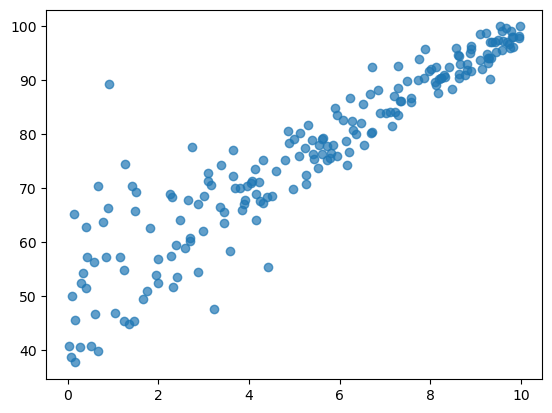

In [154]:
# plot the simulated data
import matplotlib.pyplot as plt
plt.scatter(hours, scores, alpha=0.7)